In [5]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

np.random.seed(3)

train_data_generator = ImageDataGenerator(rescale=1./255)
train_generator = train_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/train',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
    directory='./handwriting_shape_plus/test',
    target_size=(24,24),
    batch_size=3,
    class_mode='categorical'
)

Found 90 images belonging to 6 classes.
Found 30 images belonging to 6 classes.


In [6]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D

model = Sequential()
model.add(
    Conv2D(32,kernel_size=(3, 3),
           activation='relu',input_shape=(24,24,3))
)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

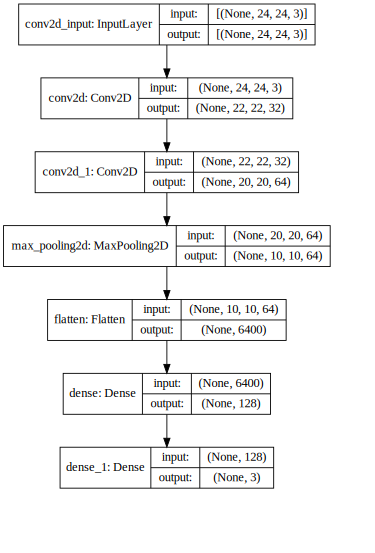

In [8]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

%matplotlib inline

SVG(model_to_dot(model, show_shapes=True, dpi=64).create(prog='dot', format='svg'))